<a href="https://colab.research.google.com/github/Stekosan/merrer/blob/main/Copy_of_SparkNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's set up SparkNLP.

In [107]:
!wget http://setup.johnsnowlabs.com/colab.sh -O - | bash

--2024-07-27 08:13:26--  http://setup.johnsnowlabs.com/colab.sh
Resolving setup.johnsnowlabs.com (setup.johnsnowlabs.com)... 3.86.22.73
Connecting to setup.johnsnowlabs.com (setup.johnsnowlabs.com)|3.86.22.73|:80... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/scripts/colab_setup.sh [following]
--2024-07-27 08:13:26--  https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1191 (1.2K) [text/plain]
Saving to: ‘STDOUT’

-                   100%[===================>]   1.16K  --.-KB/s    in 0s      

2024-07-27 08:13:26 (64.6 MB/s) - written to stdout [1191/1191]

Installing PySpark

In [108]:
import sparknlp
spark = sparknlp.start()

from sparknlp.pretrained import PretrainedPipeline

In [109]:
pipeline = PretrainedPipeline("explain_document_ml")

explain_document_ml download started this may take some time.
Approx size to download 9 MB
[OK!]


We can use some recent headlines.

In [110]:
hls = [ # was headlines
		"She",
		"He",
		"her",
		"him",
		"hers",
		"his"
	]

Let's use SparkNLP to analyze these headlines.

In [111]:
# Use dataframes, or...
# data = spark.createDataFrame(hls).toDF("text")
# dfs = pipeline.transform(data)
# ... use list comprehension
dfs = [pipeline.annotate(hl) for hl in hls] # I don't know how to use dataframes

In [112]:
# its big
dfs

[{'document': ['She'],
  'spell': ['She'],
  'pos': ['PRP'],
  'lemmas': ['She'],
  'token': ['She'],
  'stems': ['she'],
  'sentence': ['She']},
 {'document': ['He'],
  'spell': ['He'],
  'pos': ['PRP'],
  'lemmas': ['He'],
  'token': ['He'],
  'stems': ['he'],
  'sentence': ['He']},
 {'document': ['her'],
  'spell': ['her'],
  'pos': ['PRP$'],
  'lemmas': ['she'],
  'token': ['her'],
  'stems': ['her'],
  'sentence': ['her']},
 {'document': ['him'],
  'spell': ['him'],
  'pos': ['PRP'],
  'lemmas': ['he'],
  'token': ['him'],
  'stems': ['him'],
  'sentence': ['him']},
 {'document': ['hers'],
  'spell': ['hers'],
  'pos': ['NNS'],
  'lemmas': ['hers'],
  'token': ['hers'],
  'stems': ['her'],
  'sentence': ['hers']},
 {'document': ['his'],
  'spell': ['his'],
  'pos': ['PRP$'],
  'lemmas': ['he'],
  'token': ['his'],
  'stems': ['hi'],
  'sentence': ['his']}]

Let's say we want to fuse part-of-speech tags to words, to make word differentiation easier.

In [113]:
# Extract words and parts-of-speech
tok_tag = [(df['token'],df['pos']) for df in dfs]

In [114]:
# Still big
tok_tag

[(['She'], ['PRP']),
 (['He'], ['PRP']),
 (['her'], ['PRP$']),
 (['him'], ['PRP']),
 (['hers'], ['NNS']),
 (['his'], ['PRP$'])]

In [115]:
# fuse pos to word
zips = [list(zip(tt[0], tt[1])) for tt in tok_tag]

In [116]:
# not too big
zips

[[('She', 'PRP')],
 [('He', 'PRP')],
 [('her', 'PRP$')],
 [('him', 'PRP')],
 [('hers', 'NNS')],
 [('his', 'PRP$')]]

In [117]:
tagged = [" ".join(["".join(word) for word in hl]) for hl in zips]

In [118]:
tagged

['ShePRP', 'HePRP', 'herPRP$', 'himPRP', 'hersNNS', 'hisPRP$']

What about ebooks?

In [119]:
!curl "https://raw.githubusercontent.com/Stekosan/merrer/main/sparknlp/Diaries_of_Court_Ladies_of_Old_Japan.txt" -o diary.txt


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  325k  100  325k    0     0   828k      0 --:--:-- --:--:-- --:--:--  830k


In [120]:
!curl "https://raw.githubusercontent.com/Stekosan/merrer/main/sparknlp/TheTalesOfGenji.txt" -o genji.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  540k  100  540k    0     0  1242k      0 --:--:-- --:--:-- --:--:-- 1266k


In [121]:
diary = open('diary.txt').read()

In [122]:
genji = open('genji.txt').read()

In [123]:
print(diary[:1000])

﻿*** START OF THE PROJECT GUTENBERG EBOOK DIARIES OF COURT LADIES OF OLD JAPAN ***

DIARIES OF

COURT LADIES OF OLD JAPAN

TRANSLATED BY

ANNIE SHEPLEY OMORI

AND

KOCHI DOI

_Professor in the Imperial University, Tokio_

WITH AN INTRODUCTION BY

AMY LOWELL


_And with Illustrations_


BOSTON AND NEW YORK

HOUGHTON MIFFLIN COMPANY

The Riverside Press Cambridge

1920



[Illustration: COURT LADY'S FULL DRESS IN THE HEIAN PERIOD]

(For explanation see List of Illustrations)




TRANSLATORS' NOTE


The poems in the text, slight and occasional as they are, depending
often for their charm on plays upon words of two meanings, or on
the suggestions conveyed to the Japanese mind by a single word,
have presented problems of great difficulty to the translators, not
perfectly overcome.

Izumi Shikibu's Diary is written with extreme delicacy of treatment.
English words and thought seem too downright a medium into which to
render these evanescent, half-expressed sentences and poems--vague as
the m

In [124]:
print(genji[:1000])

*** START OF THE PROJECT GUTENBERG EBOOK THE TALE OF GENJI ***




                         THE TALE OF GENJI

                                 By
                           LADY MURASAKI

                   Translated from the Japanese by
                            ARTHUR WALEY

                         Boston and New York
                      HOUGHTON MIFFLIN COMPANY
                    The Riverside Press Cambridge
                                1925

                                 To
                           BERYL DE ZOETE




                              PREFACE


Readers of the _Diaries of Court Ladies of Old Japan_, translated by
Madame Omori and Professor Doi, will remember that the second of the
three diaries is that of a certain Murasaki Shikibu. The little that
is known of this lady’s life has been set forth by Miss Amy Lowell
in her Introduction to that book. A few dates, most of them very
insecure, will be found in Appendix I of this volume. It is, however,
certain

In [125]:
pipeline.annotate(diary[:100])['pos']

['NN',
 'NN',
 'NNP',
 'IN',
 'DT',
 'NNP',
 'NNP',
 'NNP',
 'NNP',
 'IN',
 'NNP',
 'NNP',
 'IN',
 'NNP',
 'NNP',
 'NN',
 'NNP',
 'IN',
 'PRP$']

Previously with ebooks, we conducted word counts. We can do that here as well, with Spark.

In [126]:
pipeline.annotate(genji[:120])['pos']

['NN',
 'NNP',
 'IN',
 'DT',
 'NNP',
 'NNP',
 'NNP',
 'DT',
 'NNP',
 'IN',
 'NNP',
 'NN',
 'DT',
 'NNP',
 'IN',
 'NNP']

In [127]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("demo").getOrCreate()

In [128]:
# change 'corpus context' variable from a string to a spark object
diary = spark.sparkContext.textFile("diary.txt")

counts = (
    diary.flatMap(lambda line: line.split(" "))
    .map(lambda word: (word, 1))
    .reduceByKey(lambda a, b: a + b)
)

In [129]:
genji = spark.sparkContext.textFile("genji.txt")

counts2 = (
    genji.flatMap(lambda line: line.split(" "))
    .map(lambda word: (word, 1))
    .reduceByKey(lambda a, b: a + b)
)

In [130]:
counts.collect()[:100]

[('***', 4),
 ('OF', 23),
 ('GUTENBERG', 2),
 ('DIARIES', 5),
 ('COURT', 8),
 ('LADIES', 4),
 ('OLD', 7),
 ('JAPAN', 4),
 ('', 7244),
 ('TRANSLATED', 1),
 ('ANNIE', 1),
 ('SHEPLEY', 1),
 ('OMORI', 1),
 ('KOCHI', 1),
 ('_Professor', 1),
 ('in', 922),
 ('Imperial', 17),
 ('University,', 1),
 ('Tokio_', 1),
 ('INTRODUCTION', 3),
 ('LOWELL', 3),
 ('Illustrations_', 1),
 ('NEW', 1),
 ('YORK', 1),
 ('HOUGHTON', 1),
 ('MIFFLIN', 1),
 ('The', 506),
 ('Riverside', 1),
 ('Cambridge', 1),
 ('1920', 1),
 ("LADY'S", 2),
 ('FULL', 2),
 ('HEIAN', 2),
 ('List', 2),
 ('of', 1803),
 ('NOTE', 1),
 ('poems', 28),
 ('text,', 2),
 ('occasional', 5),
 ('as', 247),
 ('are,', 3),
 ('depending', 1),
 ('plays', 1),
 ('upon', 35),
 ('two', 51),
 ('conveyed', 1),
 ('mind', 46),
 ('single', 3),
 ('have', 213),
 ('presented', 17),
 ('difficulty', 3),
 ('perfectly', 3),
 ('overcome.', 1),
 ('is', 547),
 ('extreme', 5),
 ('delicacy', 2),
 ('treatment.', 1),
 ('English', 2),
 ('thought', 84),
 ('downright', 1),
 ('medi

In [131]:
counts2.collect()[:100]

[('***', 4),
 ('OF', 11),
 ('GUTENBERG', 2),
 ('TALE', 4),
 ('GENJI', 3),
 ('', 3770),
 ('Translated', 1),
 ('New', 15),
 ('HOUGHTON', 1),
 ('MIFFLIN', 1),
 ('The', 406),
 ('Riverside', 1),
 ('Cambridge', 1),
 ('1925', 1),
 ('BERYL', 1),
 ('DE', 1),
 ('PREFACE', 4),
 ('of', 2425),
 ('_Diaries', 1),
 ('Court', 35),
 ('Ladies', 5),
 ('Old', 3),
 ('Japan_,', 2),
 ('translated', 3),
 ('Professor', 1),
 ('Doi,', 1),
 ('three', 24),
 ('diaries', 1),
 ('is', 477),
 ('certain', 58),
 ('Murasaki', 31),
 ('Shikibu.', 1),
 ('known', 27),
 ('this', 528),
 ('lady’s', 24),
 ('set', 41),
 ('Miss', 4),
 ('Amy', 1),
 ('in', 1535),
 ('her', 1421),
 ('book.', 2),
 ('them', 155),
 ('very', 433),
 ('insecure,', 1),
 ('It', 214),
 ('is,', 9),
 ('however,', 6),
 ('was', 1916),
 ('last', 145),
 ('quarter', 7),
 ('tenth', 8),
 ('lost', 21),
 ('husband', 8),
 ('1001,', 1),
 ('years', 46),
 ('know', 84),
 ('account', 12),
 ('proficiency', 2),
 ('subject', 3),
 ('young', 94),
 ('anxious', 9),
 ('study.', 1),
 ('A

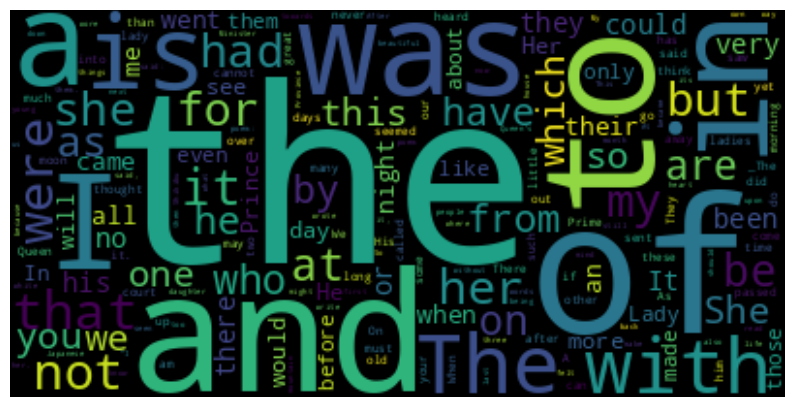

In [77]:
# prompt: generate the words cloud visual

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming 'counts' is your RDD of (word, count) pairs
word_counts = counts.collectAsMap()

wordcloud = WordCloud().generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [134]:
# filter for only the pronouns
corpus_pronouns_diary = counts.filter(lambda x: x[0] in hls).collect()


In [135]:
corpus_pronouns_genji = counts2.filter(lambda x: x[0] in hls).collect()

In [136]:
print(corpus_pronouns_diary)

[('her', 364), ('his', 152), ('She', 186), ('hers', 1), ('He', 112), ('him', 61)]


In [141]:
print(corpus_pronouns_genji)

[('her', 1421), ('his', 939), ('She', 211), ('hers', 4), ('him', 515), ('He', 337)]


In [142]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

# Sort the pronoun counts
corpus_pronouns_diary_sorted = sorted(corpus_pronouns_diary, key=lambda x: x[1], reverse=True)
corpus_pronouns_genji_sorted = sorted(corpus_pronouns_genji, key=lambda x: x[1], reverse=True)

# Set a color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Create bar charts
pio.templates.default = "plotly_white"
fig_diary = px.bar(corpus_pronouns_diary_sorted,
                     x=[x[0] for x in corpus_pronouns_diary_sorted],
                     y=[x[1] for x in corpus_pronouns_diary_sorted],
                     labels={'x':'Pronoun', 'y':'Count'},
                     title='Pronoun Counts in Diary of Court Ladies of Old Japan',
                     color_discrete_sequence=colors)
fig_diary.show()

fig_genji = px.bar(corpus_pronouns_genji_sorted,
                     x=[x[0] for x in corpus_pronouns_genji_sorted],
                     y=[x[1] for x in corpus_pronouns_genji_sorted],
                     labels={'x':'Pronoun', 'y':'Count'},
                     title='Pronoun Counts in The Tale of Genji',
                     color_discrete_sequence=colors)
fig_genji.show()